In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir=r'D:\books\deeplearning\Data set, Presentation and Python Notebook for Image recognition project module\train'
validation_dir=r'D:\books\deeplearning\Data set, Presentation and Python Notebook for Image recognition project module\validation'
test_dir=r'D:\books\deeplearning\Data set, Presentation and Python Notebook for Image recognition project module\test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                     target_size=(150,150),
                                                     batch_size=20,
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

### <font color=orange>After each pooling size of image goes on decreasing from 150->75->37->18 & feature increase<font>

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [10]:
history=model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=20,
validation_data=validation_generator,
validation_steps=50)

C:\Users\USER\AppData\Local\Temp/ipykernel_6476/725994839.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/20
100/100 [==============================] - 46s 446ms/step - loss: 0.6868 - acc: 0.5475 - val_loss: 0.6731 - val_acc: 0.5190
Epoch 2/20
100/100 [==============================] - 38s 376ms/step - loss: 0.6425 - acc: 0.6375 - val_loss: 0.7656 - val_acc: 0.5360
Epoch 3/20
100/100 [==============================] - 38s 378ms/step - loss: 0.5899 - acc: 0.6865 - val_loss: 0.6054 - val_acc: 0.6770
Epoch 4/20
100/100 [==============================] - 38s 379ms/step - loss: 0.5547 - acc: 0.7180 - val_loss: 0.5986 - val_acc: 0.6870
Epoch 5/20
100/100 [==============================] - 38s 380ms/step - loss: 0.5290 - acc: 0.7260 - val_loss: 0.5781 - val_acc: 0.6870
Epoch 6/20
100/100 [==============================] - 38s 377ms/step - loss: 0.4969 - acc: 0.7605 - val_loss: 0.5911 - val_acc: 0.6810
Epoch 7/20
100/100 [==============================] - 38s 382ms/step - loss: 0.4828 - acc: 0.7570 - val_loss: 0.5793 - val_acc: 0.7030
Epoch 8/20
100/100 [==============================] - 3

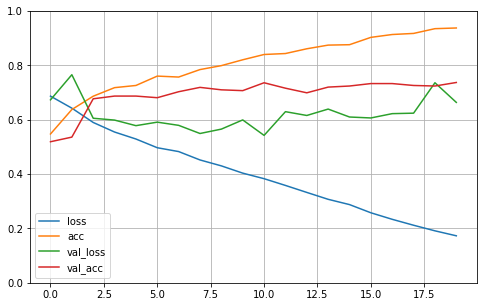

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
test_generator=test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
print(model.evaluate_generator(test_generator,steps=50))

C:\Users\USER\AppData\Local\Temp/ipykernel_6476/2775330812.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print(model.evaluate_generator(test_generator,steps=50))


[0.6515556573867798, 0.746999979019165]


In [14]:
pred = model.predict_generator(test_generator)

predictions = pred > .5

print(test_generator.classes,predictions)

C:\Users\USER\AppData\Local\Temp/ipykernel_6476/2159524956.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_generator)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

1/1 [==============================] - 0s 20ms/step
[[1.]]
[0]


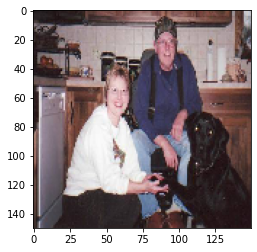

In [23]:
image_path=r"D:\books\deeplearning\Data set, Presentation and Python Notebook for Image recognition project module\test\dogs\dog.1736.jpg"
#image_path=r"D:\books\deeplearning\dog.jpg"
img = tf.keras.utils.load_img(image_path, target_size=(150,150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
#result= (model.predict(img) > 0.5).astype("int32")
#classes = model.predict_classes(img)
predict_x=model.predict(img)
classes_x=np.argmax(predict_x,axis=1)
print(predict_x)
print(classes_x)
plt.show()